В этом проекте я буду работать с данными, включая их загрузку, предварительную обработку, исследовательский анализ и визуализацию.

In [ ]:
!pip install plotly

## Импорт библиотек

In [ ]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import numpy as np

## Загрузка данных

In [ ]:
!gdown 1hOqWeknUFhuotXxczZcIy9sYDO9z38TJ

Downloading...
From: https://drive.google.com/uc?id=1hOqWeknUFhuotXxczZcIy9sYDO9z38TJ
To: /content/pokemon.csv
100% 161k/161k [00:00<00:00, 56.5MB/s]


В задачах я буду работать с [The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon), в котором описаны характеристики покемонов — вымышленных существ из франшизы «Покемон».

In [ ]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
pokemon.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [ ]:
pokemon.shape

(801, 41)

(801, 41)

In [ ]:
pokemon.dtypes

,0
abilities,object
against_bug,float64
against_dark,float64
against_dragon,float64
against_electric,float64
against_fairy,float64
against_fight,float64
against_fire,float64
against_flying,float64
against_ghost,float64


Считаем пропущенные столбцы

In [ ]:
missing_data = pokemon.isnull().sum()

max_missing_column = missing_data.idxmax()
max_missing_count = missing_data.max()
max_missing_count

384

In [ ]:
max_missing_column

'type2'

Удалю строки с пропусками в признаке, полученном в прошлом пункте.



In [ ]:
pokemon.dropna(subset='type2', inplace=True)
pokemon.shape

(417, 41)

417

Столько строк осталось в таблице.

Гистограмма распеределения `defense`:

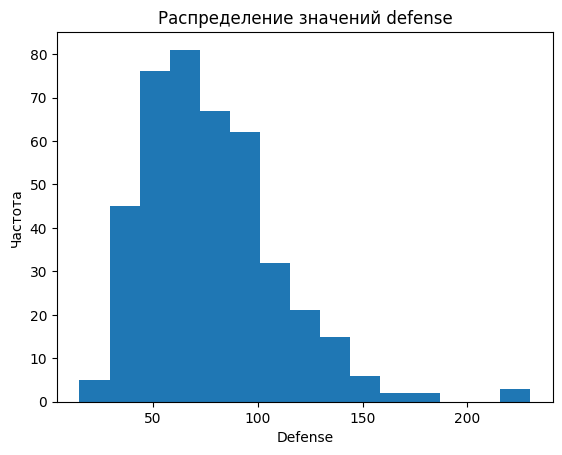

In [ ]:
plt.hist(pokemon['defense'], bins=15)
plt.title('Распределение значений defense')
plt.xlabel('Defense')
plt.ylabel('Частота')
plt.show()


In [ ]:
mode = pokemon['defense'].mode()
mode

,defense
0,50


Barplot среднего значения `attack` для каждого типа покемонов (`type1`):



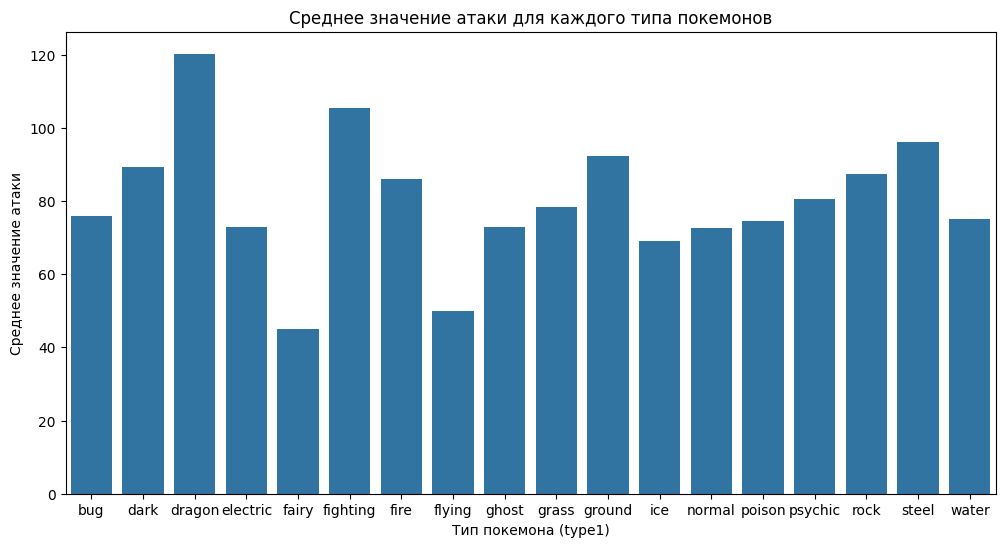

In [ ]:
avg_attack_by_type = pokemon.groupby('type1')['attack'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='type1', y='attack', data=avg_attack_by_type)

plt.title('Среднее значение атаки для каждого типа покемонов')
plt.xlabel('Тип покемона (type1)')
plt.ylabel('Среднее значение атаки')

plt.show()

По графику видно, что "fairy" на последнем месте.

Pairplot для признаков `attack`, `defense`, `hp`


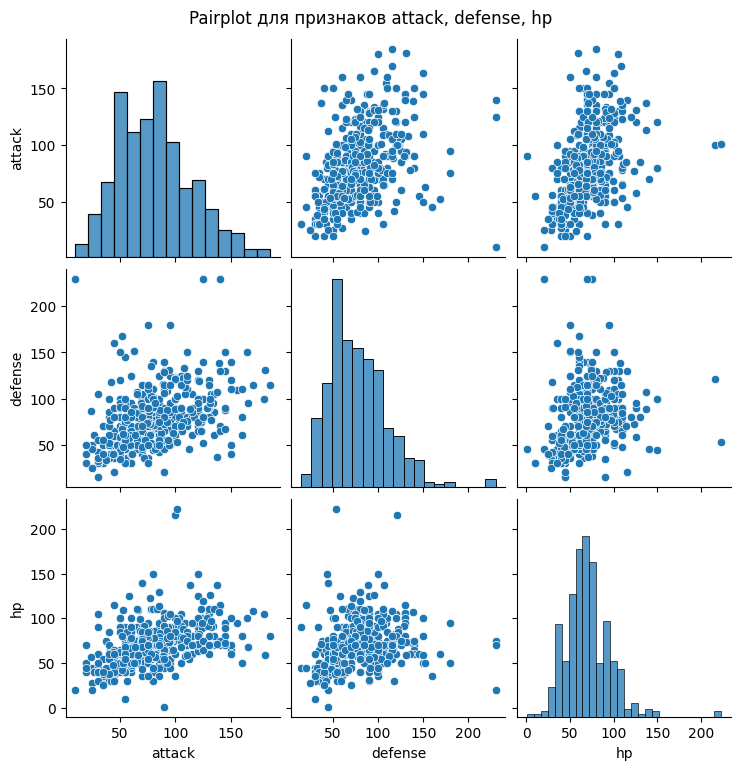

In [ ]:
sns.pairplot(pokemon[['attack', 'defense', 'hp']])

plt.suptitle('Pairplot для признаков attack, defense, hp', y=1.02)
plt.show()

На гистограмме Attack заметно, что большинство покемонов имеют средний уровень атаки, а очень высокие показатели встречаются редко. Это логично, ведь слишком крутых атакующих покемонов должно быть мало.

 В целом на гистограммах можно увидеть, что распределения всех трех показателей напоминают нормальное, но со сдвигом в сторону низких значений. Так, сильные покемоны скорее редкость, но и "мусорных" покемонов не так много.

На графике Attack/Defense заметно, что чем выше у покемона Attack, тем выше его Defense. Это можно связать с тем, что сильные атакующие покемоны, как правило, имеют и хорошую защиту.

In [ ]:
top_5_types = pokemon.groupby("type1")["defense"].min().nlargest(5)
top_5_types

,defense
type1,
fairy,85
fighting,55
steel,50
dragon,45
rock,45


In [ ]:
fairy_variance = round(np.var(pokemon[pokemon["type1"] == "fairy"]["sp_defense"], ddof=0), 2)
print(fairy_variance)

fighting_variance = round(np.var(pokemon[pokemon["type1"] == "fighting"]["sp_defense"], ddof=0), 2)
print(fighting_variance)

steel_variance = round(np.var(pokemon[pokemon["type1"] == "steel"]["sp_defense"], ddof=0), 2)
print(steel_variance)

dragon_variance = round(np.var(pokemon[pokemon["type1"] == "dragon"]["sp_defense"], ddof=0), 2)
print(steel_variance)

rock_variance = round(np.var(pokemon[pokemon["type1"] == "rock"]["sp_defense"], ddof=0), 2)
print(steel_variance)

25.0
82.58
598.43
598.43
598.43


Ответ: 25

In [ ]:
avg_stats = pokemon.groupby("type1")[["hp", "attack", "defense", "speed"]].mean().reset_index()
avg_stats

,type1,hp,attack,defense,speed
0,bug,58.055556,75.944444,75.074074,68.444444
1,dark,78.200000,89.400000,74.650000,71.600000
2,dragon,95.400000,120.266667,101.733333,89.400000
3,electric,60.538462,73.000000,72.461538,90.846154
4,fairy,70.000000,45.000000,90.000000,60.000000
5,fighting,71.666667,105.500000,76.333333,81.833333
6,fire,76.960000,85.960000,78.800000,75.440000
7,flying,62.500000,50.000000,57.500000,89.000000
8,ghost,71.222222,73.000000,74.000000,61.666667
9,grass,68.219512,78.243902,72.804878,58.439024


In [ ]:
avg_stats_filtered = avg_stats[avg_stats["type1"].isin(["fairy", "fighting", "steel", "dragon", "rock"])]
avg_stats_filtered

,type1,hp,attack,defense,speed
2,dragon,95.400000,120.266667,101.733333,89.400000
4,fairy,70.000000,45.000000,90.000000,60.000000
5,fighting,71.666667,105.500000,76.333333,81.833333
15,rock,66.205882,87.352941,95.647059,63.117647
16,steel,68.150000,96.200000,122.750000,56.900000


In [ ]:
avg_stats_filtered = avg_stats_filtered.melt(id_vars="type1", var_name="stat", value_name="value")
avg_stats_filtered

,type1,stat,value
0,dragon,hp,95.400000
1,fairy,hp,70.000000
2,fighting,hp,71.666667
3,rock,hp,66.205882
4,steel,hp,68.150000
5,dragon,attack,120.266667
6,fairy,attack,45.000000
7,fighting,attack,105.500000
8,rock,attack,87.352941
9,steel,attack,96.200000


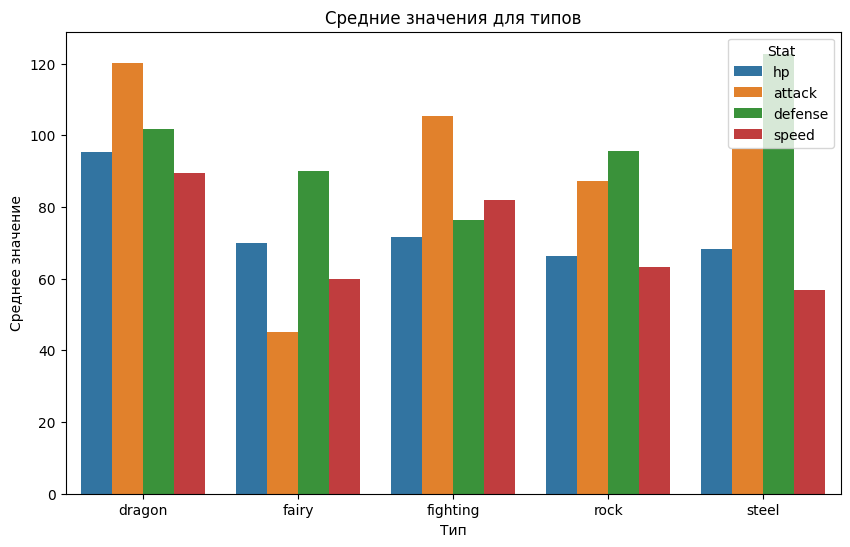

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="type1", y="value", hue="stat", data=avg_stats_filtered)

plt.xlabel("Тип")
plt.ylabel("Среднее значение")
plt.title("Средние значения для типов")
plt.legend(title="Stat")


У вида покемонов fighting самая маленькая средняя защита

In [ ]:
legendary_stats = pokemon.groupby("is_legendary")[["hp", "attack", "defense", "speed"]].mean()
legendary_stats

,hp,attack,defense,speed
is_legendary,,,,
0,66.706989,77.174731,75.311828,65.473118
1,99.066667,114.444444,97.088889,96.755556


У легендарных покемонов в среднем все показатели выше - верно.

In [ ]:
columns = ["is_legendary", "hp", "attack", "defense", "speed"]
matrix = pokemon[columns].corr()
matrix

,is_legendary,hp,attack,defense,speed
is_legendary,1.000000,0.397510,0.349795,0.206337,0.336234
hp,0.397510,1.000000,0.468934,0.249102,0.194050
attack,0.349795,0.468934,1.000000,0.435320,0.362395
defense,0.206337,0.249102,0.435320,1.000000,-0.066731
speed,0.336234,0.194050,0.362395,-0.066731,1.000000


- покемоны с высокой защитой бывают как быстрыми, так и медленными
- покемоны с высоким значением ПЗ чаще имеют и высокое значение урона